# Grid search Method

What is the grid search method?

Grid search is a straightforward method for hyperparameter optimization in ML. It is a well-known approach (after the random search method) commonly employed by ML practitioners due to its simplicity and convenience of implementation. We’ll learn its theory and how to apply it in a simple ML project using the open-source Python library called scikit-learn.

The grid search procedure begins with the specification of a set of possible values for each hyperparameter. For instance, if the ML model includes two hyperparameters, one for the learning rate and one for the number of estimators, the learning rate can be set to 0.1, 0.01, or 0.001, and the number of estimators can be set to 10, 20, or 50.

Once the value range for each hyperparameter has been set, the grid search method will train and evaluate an ML model for each hyperparameter value combination. This can be computationally expensive, especially if there are a large number of hyperparameters and alternative values for each. Nonetheless, it is a straightforward and widely used method to find the best hyperparame

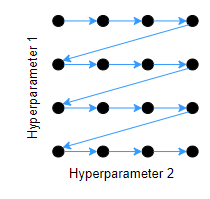

The above illustration shows how the grid search method selects each possible combination of hyperparameter values.

Grid search is an exhaustive method, meaning that it searches the entire grid of hyperparameter values, rather than stopping after a certain number of iterations or when it finds a good enough set of parameters.

For example, if the ML algorithm has seven hyperparameters and each one of them has five different values for optimization, this means that the ML model will be trained 78,125 times in total to find the best combination of hyperparameter values.

It is recommended to implement the grid search method on a powerful computer or cloud computing technology (AWS, AZURE, GCP) if:

There are many hyperparameters for optimization.

There are many different values for each hyperparameter.

The dataset for the ML project is very large.

Therefore, the grid search is a method for hyperparameter optimization that is preferable to use in the following situations:

When the number of hyperparameters is small

When the ML algorithm is simple and does not require much expertise to implement

When the dataset is relatively smallters.



## Import important packages
First, we import important Python packages that will do the following tasks:

- Load the dataset.
- Clean the dataset.
- Process the dataset using feature engineering techniques.
- Create and train machine learning model (the random forest algorithm).
- Check machine learning model performance.
- Implement grid search method.
- Identify combination of hyperparameters that provide the best results.



In [1]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# Seeding
np.random.seed(123)


## Load the dataset
We will use pandas to load the dataset from the data folder. The name of the dataset is
loan_data.csv.

In [2]:
# Load data

data_path = "loan_data.csv"

data = pd.read_csv(data_path)

Let’s see the first five rows of the dataset using the head() method from pandas.

In [3]:
# Show the top five rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see, the dataset has 13 columns.

- Loan_ID: Unique loan ID
- Gender: Male/Female 
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant education (Graduate/Undergraduate)
- Self_Employed: Self-employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Co-applicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of the loan in months
- Credit_History: Credit history meets guidelines
- Property_Area: Urban/Semi-Urban/Rural
- Loan_Status: Loan approved (Y/N)

The shape method from pandas will let us know the total number of rows and columns available in
the dataset.

In [4]:
# Check the shape of the data
data.shape

(614, 13)

The dataset has 614 loan data.

The pandas method called info() provides more details about each column presented in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The information above shows that the dataset has columns with different data types, such as object/string, integers, and float.

## Check missing values

It is important to clean the dataset by checking if it has any missing values before starting to
train the machine learning model.

The following code will provide a total of missing values for each column presented in the dataset.

In [6]:
# Check missing values in data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The output shows that our dataset has some missing values in different columns.

First, let’s convert some values in the Loan_Status and Dependents columns into numerical values.

In [7]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Replace with numerical values
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

For columns with object data type, we use the mode() function from pandas to identify the most common value in that particular column and insert the identified value into all missing points in the column.

For columns with numerical data type(int64 or float64), we use the median() function from pandas to find the median value in that particular column and insert the identified value into all missing points in the column.

In [14]:
round(100*(data.isnull().sum()/len(data.index)),2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [15]:
# Handle missing data 
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

We drop the ID column because it is not used in the process of training a machine learning model.

In [16]:
# Drop ID column
data = data.drop('Loan_ID',axis=1)

Let's check again if all missing values in the dataset have been handled.

In [17]:
# Check missing values in data
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Finally, the dataset does not have any missing values.

## How to evaluate class distribution
Identifying the class distribution helps us to know if the dataset is balanced or not. The value_counts() method from the pandas package can evaluate the class distribution by showing the total number of each unique value in the target column.

In [18]:
# Evaluate the Loan_status column
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

This shows that in this dataset, the distribution in the target column is unequal. There are more 1 values (Yes) than 0 values (No).

## Split data into feature and target variables

The next step is to split data into feature and target variables.

In [19]:
#Split features and target from  data
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status.values

The target is the Loan_Status variable.

## Preprocess the features

However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use: 

- The **MinMaxScaler()** method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
- The **get_dummies()** method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [20]:
#Scale the numerical columns with MinMaxScaler() 
X["ApplicantIncome"] = MinMaxScaler().fit_transform(X["ApplicantIncome"].values.reshape(-1,1))
X["LoanAmount"] = MinMaxScaler().fit_transform(X["LoanAmount"].values.reshape(-1,1))
X["CoapplicantIncome"] = MinMaxScaler().fit_transform(X["CoapplicantIncome"].values.reshape(-1,1))
X["Loan_Amount_Term"] = MinMaxScaler().fit_transform(X["Loan_Amount_Term"].values.reshape(-1,1))

In [21]:
#Change categorical features to numerical with get_dummies() 
X = pd.get_dummies(X)

#Convert the DataFrame to a NumPy array. 
X = X.to_numpy()

## Train a base machine learning model

In this example,we will train the random forest algorithm with default hyperparameter values using the cross-validation technique to check the model performance.


In [22]:
# Create a classifier
random_classifier = RandomForestClassifier(random_state=987)

## Preprocess the features

However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use: 

- The **MinMaxScaler()** method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
- The **get_dummies()** method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [23]:
# Define function to evaluate f1_score
def f1_scorer(estimator, X, y):
    y_preds = estimator.predict(X)
    f1 = f1_score(y, y_preds, average='macro')
    return round(f1, 4)


# Implement and run the cross-val-score method
score = cross_val_score(estimator=random_classifier,
                        X=X,
                        y=y,
                        scoring=f1_scorer,
                        cv=3,
                        n_jobs=-1)

# Print the mean score
print(round(score.mean(), 4))

0.7157


The mean score of our machine learning model is 0.7157 which is a good performance.

## Implement the grid search method

Because we know how well the machine learning model works with the default hyperparameter values, we can try to improve the model’s performance using the grid search method to find the combination of hyperparameter values that can give an F1-score of more than 0.7157.

The random forest algorithm has multiple hyperparameters, as shown below:

`RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)` [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

However, for this example, we will use the following important hyperparameters to find the right combination of their values to get an F1-score greater than 0.7157.

- `n_estimators`: Represents the number of trees in the forest
- `criterion`: The function to measure the quality of a split
- `max_depth`: The maximum depth of the tree
- min_samples_leaf: The minimum number of samples required to be at a leaf node
- `min_samples_split`: The minimum number of samples required to split an internal node

To implement the grid search method using the scikit-learn library, we need to define the following important parameters.

- `estimator`: The machine learning algorithm to train with different combinations of
hyperparameter's values
- `param_grid`: The dictionary with parameter names (string value) as keys and distributions or lists of parameters to try (search space)
- `scoring`: The method to evaluate the performance of the cross-validated model. For this example, we will use the F1-score.
- `CV`: Thhe number of folds for cross-validation. The standard numbers are 5 and 10.

In [24]:
# Define the parameters for grid search method

#1. Estimator
random_classifier = RandomForestClassifier(random_state=987)

#2. Param distributions (define the search space)
distributions = dict(n_estimators=[50, 100, 200],
                     criterion=['gini', 'entropy','log_loss'],
                     max_depth=[10, 20, 30, 40, 50],
                     n_jobs=[-1],
                     min_samples_leaf=[1, 2, 3, 5, 6])

#4. Scoring
scoring = f1_scorer

#5. Cross-validation splitting strategy
cv = 3

Note: We need to read the algorithm documentation to understand the function of each hyperparameter and the types of values we can add to the params distribution. For the random forest algorithm, we can read [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

The next step is to import `GridSearchCV` from the scikit-learn library and  instantiate the
grid search.

In [25]:
# Import the grid search method from the scikit learn
from sklearn.model_selection import GridSearchCV

# Define search
search = GridSearchCV(estimator=random_classifier,
                      param_grid=distributions,
                      scoring=scoring,
                      cv=cv,
                      verbose=2)

Once everything has been defined, the search is executed by using the fit() method with the training dataset.

In [26]:
# Execute search
results = search.fit(X , y)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=200, n_jobs=-1; total time=   0.3s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=200, n_jobs=-1; total time=   0.3s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=200, n_jobs=

Note: The time it takes to run the search could range anywhere from a few minutes to hours, depending on the scope of the search space, dataset size, and the processing power of the hardware.

At the end of the search, we can use the following attributes to access all the results.

- `best_estimator`: The estimator that gave the highest score
- `best_params`: The combination of hyperparameters that gave the best results
- `best_scores`: The mean cross-validated score of the best_estimator

In [27]:
# Show the best estimator
print("best estimator:", results.best_estimator_)

best estimator: RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=987)


In [28]:
# Show the best combination of hyperparameters
print("best combination of hyperparameters:", results.best_params_)

best combination of hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1}


In [29]:
# Show the best score after performing the grid search method
print("Best score:", round(results.best_score_,4))

Best score: 0.7248


The best score is 0.7248, which is greater than 0.7157.

As we can see, the performance of the machine learning model has increased compared to the machine learning model trained with default hyperparameters.

It is recommended to add or change more options or values of hyperparameters on the **param_grid** and then try to
rerun it It may be able to provide better results than what we have found.

# Advantages of the grid search method

Coverage: It ensures that every possible combination of hyperparameters is tested, therefore providing full coverage of the hyperparameter space. This can help to find the best combination that produces the best performance of the ML model based on the defined hyperparameters and their values.t



Simplicity: It is easy to implement and understand, making it a simple and straightforward approach for hyperparameter optimization. We just need to define the ML algorithm, parameters distribution, and the evaluation metrics for it to start the optimization process.

Reproducibility: This approach makes it possible to easily reproduce results through the use of a set of hyperparameters that are predefined.

Flexibility: It is a flexible method for hyperparameter optimization because it can be easily changed to work with different ML algorithms and hyperparameters. This makes it a great choice for hyperparameter o

# Disadvantages of the grid search method

Computational cost: The method involves training and evaluating the ML model multiple times for different combinations of hyperparameters, which can be computationally expensive and time-consuming. This can become a significant disadvantage when working with large datasets or complex ML models.ct



Overfitting: When applied, it can lead to overfitting of the model if the grid is too fine-grained or if the number of training samples is too small. This can result in an ML model that performs well on the training data but poorly on unseen data.

Limited exploration: It only explores the hyperparameter values that are specified in the grid, which means that it may miss out on other optimal values of the hyperparameters that are not included in the grid. This can limit the performance of the model and lead to suboptim

In summary, the grid search method is an effective and easy-to-use method for hyperparameter optimization. To take full advantage of the grid search method, it is advised to have powerful computational resources, address overfitting challenges, and explore more hyperparameter values during the optimization process. Additionally, it’s a preferred technique for hyperparameter tuning in different ML algorithms.al results.ptimization.